DSCI 552: Homework #3

Michael Hanono

ID: 1426377592

October 2021

In [ ]:
# Pip install whatever libraries are necessary
!pip install pandas
!pip install openpyxl
!pip install seaborn
!pip install numpy
!pip install -U scikit-learn
!pip install matplotlib
!pip install statsmodels
!pip install statistics
!pip install bootstrapped

In [1]:
# Import libraries that are necessary
import os
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from scipy import special
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
import statistics as stats
import random
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from statsmodels.regression import linear_model

(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/
Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\
%29 . The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple files each of which represents an instant of a human
performing an activity.1 Each file containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13,
vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.


(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data.


In [2]:
# Bending data

bending1_1 = pd.read_csv('../data/bending1/dataset1.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending1_2 = pd.read_csv('../data/bending1/dataset2.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending1_3 = pd.read_csv('../data/bending1/dataset3.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending1_4 = pd.read_csv('../data/bending1/dataset4.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending1_5 = pd.read_csv('../data/bending1/dataset5.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending1_6 = pd.read_csv('../data/bending1/dataset6.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending1_7 = pd.read_csv('../data/bending1/dataset7.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',') 

bending2_1 = pd.read_csv('../data/bending2/dataset1.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending2_2 = pd.read_csv('../data/bending2/dataset2.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending2_3 = pd.read_csv('../data/bending2/dataset3.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending2_4 = pd.read_csv('../data/bending2/dataset4.csv', index_col=0, skiprows = [0, 1, 2, 3], delim_whitespace=True)
bending2_5 = pd.read_csv('../data/bending2/dataset5.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')
bending2_6 = pd.read_csv('../data/bending2/dataset6.csv', index_col=0, skiprows = [0, 1, 2, 3], sep=',')

cycling1 = pd.read_csv('../data/cycling/dataset1.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling2 = pd.read_csv('../data/cycling/dataset2.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling3 = pd.read_csv('../data/cycling/dataset3.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling4 = pd.read_csv('../data/cycling/dataset4.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling5 = pd.read_csv('../data/cycling/dataset5.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling6 = pd.read_csv('../data/cycling/dataset6.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling7 = pd.read_csv('../data/cycling/dataset7.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling8 = pd.read_csv('../data/cycling/dataset8.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling9 = pd.read_csv('../data/cycling/dataset9.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling10 = pd.read_csv('../data/cycling/dataset10.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling11 = pd.read_csv('../data/cycling/dataset11.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling12 = pd.read_csv('../data/cycling/dataset12.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling13 = pd.read_csv('../data/cycling/dataset13.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling14 = pd.read_csv('../data/cycling/dataset14.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
cycling15 = pd.read_csv('../data/cycling/dataset15.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')

lying1 = pd.read_csv('../data/lying/dataset1.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying2 = pd.read_csv('../data/lying/dataset2.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying3 = pd.read_csv('../data/lying/dataset3.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying4 = pd.read_csv('../data/lying/dataset4.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying5 = pd.read_csv('../data/lying/dataset5.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying6 = pd.read_csv('../data/lying/dataset6.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying7 = pd.read_csv('../data/lying/dataset7.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying8 = pd.read_csv('../data/lying/dataset8.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying9 = pd.read_csv('../data/lying/dataset9.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying10 = pd.read_csv('../data/lying/dataset10.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying11 = pd.read_csv('../data/lying/dataset11.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying12 = pd.read_csv('../data/lying/dataset12.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying13 = pd.read_csv('../data/lying/dataset13.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying14 = pd.read_csv('../data/lying/dataset14.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
lying15 = pd.read_csv('../data/lying/dataset15.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')

sitting1 = pd.read_csv('../data/sitting/dataset1.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting2 = pd.read_csv('../data/sitting/dataset2.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting3 = pd.read_csv('../data/sitting/dataset3.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting4 = pd.read_csv('../data/sitting/dataset4.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting5 = pd.read_csv('../data/sitting/dataset5.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting6 = pd.read_csv('../data/sitting/dataset6.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting7 = pd.read_csv('../data/sitting/dataset7.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting8 = pd.read_csv('../data/sitting/dataset8.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting9 = pd.read_csv('../data/sitting/dataset9.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting10 = pd.read_csv('../data/sitting/dataset10.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting11 = pd.read_csv('../data/sitting/dataset11.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting12 = pd.read_csv('../data/sitting/dataset12.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting13 = pd.read_csv('../data/sitting/dataset13.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting14 = pd.read_csv('../data/sitting/dataset14.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
sitting15 = pd.read_csv('../data/sitting/dataset15.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')

standing1 = pd.read_csv('../data/standing/dataset1.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing2 = pd.read_csv('../data/standing/dataset2.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing3 = pd.read_csv('../data/standing/dataset3.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing4 = pd.read_csv('../data/standing/dataset4.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing5 = pd.read_csv('../data/standing/dataset5.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing6 = pd.read_csv('../data/standing/dataset6.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing7 = pd.read_csv('../data/standing/dataset7.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing8 = pd.read_csv('../data/standing/dataset8.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing9 = pd.read_csv('../data/standing/dataset9.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing10 = pd.read_csv('../data/standing/dataset10.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing11 = pd.read_csv('../data/standing/dataset11.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing12 = pd.read_csv('../data/standing/dataset12.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing13 = pd.read_csv('../data/standing/dataset13.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing14 = pd.read_csv('../data/standing/dataset14.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
standing15 = pd.read_csv('../data/standing/dataset15.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')

walking1 = pd.read_csv('../data/walking/dataset1.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking2 = pd.read_csv('../data/walking/dataset2.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking3 = pd.read_csv('../data/walking/dataset3.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking4 = pd.read_csv('../data/walking/dataset4.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking5 = pd.read_csv('../data/walking/dataset5.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking6 = pd.read_csv('../data/walking/dataset6.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking7 = pd.read_csv('../data/walking/dataset7.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking8 = pd.read_csv('../data/walking/dataset8.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking9 = pd.read_csv('../data/walking/dataset9.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking10 = pd.read_csv('../data/walking/dataset10.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking11 = pd.read_csv('../data/walking/dataset11.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking12 = pd.read_csv('../data/walking/dataset12.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking13 = pd.read_csv('../data/walking/dataset13.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking14 = pd.read_csv('../data/walking/dataset14.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')
walking15 = pd.read_csv('../data/walking/dataset15.csv', index_col=0, skiprows=[0, 1, 2, 3], sep=',')



In [3]:
instances = [bending1_1, bending1_2, bending1_3, bending1_4, bending1_5, bending1_6, bending1_7, 
             bending2_1, bending2_2, bending2_3, bending2_4, bending2_5, bending2_6, 
             cycling1, cycling2, cycling3, cycling4, cycling5, cycling6, cycling7, cycling8, cycling9, cycling10, cycling11, cycling12, cycling13, cycling14, cycling15, 
             lying1, lying2, lying3, lying4, lying5, lying6, lying7, lying8, lying9, lying10, lying11, lying12, lying13, lying14, lying15, 
             sitting1, sitting2, sitting3, sitting4, sitting5, sitting6, sitting7, sitting8, sitting9, sitting10, sitting11, sitting12, sitting13, sitting14, sitting15, 
             standing1, standing2, standing3, standing4, standing5, standing6, standing7, standing8, standing9, standing10, standing11, standing12, standing13, standing14, standing15, 
             walking1, walking2, walking3, walking4, walking5, walking6, walking7, walking8, walking9, walking10, walking11, walking12, walking13, walking14, walking15]

testInstances = [bending1_1, bending1_2, 
                  bending2_1, bending2_2, 
                  cycling1, cycling2, cycling3, 
                  lying1, lying2, lying3,
                  sitting1, sitting2, sitting3,
                  standing1, standing2, standing3,
                  walking1, walking2, walking3]

trainInstances = [bending1_3, bending1_4, bending1_5, bending1_6, bending1_7, 
                 bending2_3, bending2_4, bending2_5, bending2_6, 
                 cycling4, cycling5, cycling6, cycling7, cycling8, cycling9, cycling10, cycling11, cycling12, cycling13, cycling14, cycling15, 
                 lying4, lying5, lying6, lying7, lying8, lying9, lying10, lying11, lying12, lying13, lying14, lying15, 
                 sitting4, sitting5, sitting6, sitting7, sitting8, sitting9, sitting10, sitting11, sitting12, sitting13, sitting14, sitting15, 
                 standing4, standing5, standing6, standing7, standing8, standing9, standing10, standing11, standing12, standing13, standing14, standing15, 
                 walking4, walking5, walking6, walking7, walking8, walking9, walking10, walking11, walking12, walking13, walking14, walking15]


(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this
problem, we focus on time-domain features.

    i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

    Some time-domain features that are usually used in time series classification are:
        - Means
        - Median
        - Minimum
        - Maximum
        - Standard Deviations
        - First Quartile
        - Third Quartile
        - Skewness
        - Cross Correlations
        - Orders of Autoregressive
        - Moving Averages 
        - Frequencies
        - Rapid Acceleration/Deceleration

    ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.2

In [4]:
# Get a list of all the columns in the datasets
columnNames = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

In [5]:
# Define the statistics that the code is going to look for and create dictionary to store the statistics
statistics = ['Min', "Max", "Mean", "Median", "StandardDeviation", "1stQuartile", "3rdQuartile"]
statsDict = {}
statsDict["instance"] = []


# Iterate over the list of statistics and add them as keys to the dictionary
for stat in statistics:
    for i in range(len(columnNames)):
        statsDict[stat+f"_{i+1}"] = []

        
# Iterate over the list of instances and append their number with their statistics inside a dictionary    
count = 1
for instance in instances:
    statsDict['instance'].append(count)
    count += 1
    
    # Iterate over a range and append the statistics with their respective indexes to the list inside the dictionary
    for i in range(len(columnNames)):
        column = instance[columnNames[i]].values
        
        # Append the statistics
        statsDict[f"Min_{i+1}"].append(min(column))
        statsDict[f"Max_{i+1}"].append(max(column))
        statsDict[f"Mean_{i+1}"].append(sum(column)/len(column))
        statsDict[f"Median_{i+1}"].append(np.median(column))
        statsDict[f"StandardDeviation_{i+1}"].append(stats.pstdev(column))
        statsDict[f"1stQuartile_{i+1}"].append(np.quantile(column, 0.25))
        statsDict[f"3rdQuartile_{i+1}"].append(np.quantile(column, 0.75))
        
        
# Transform the dictionary to a dataframe and output it
statsDf = pd.DataFrame.from_dict(statsDict, orient='columns')
statsDf = statsDf.set_index('instance')
print("Dataframe containing statistics (from both test and training datasets):")
statsDf.head(88)

Dataframe containing statistics (from both test and training datasets):


,Min_1,Min_2,Min_3,Min_4,Min_5,Min_6,Max_1,Max_2,Max_3,Max_4,...,1stQuartile_3,1stQuartile_4,1stQuartile_5,1stQuartile_6,3rdQuartile_1,3rdQuartile_2,3rdQuartile_3,3rdQuartile_4,3rdQuartile_5,3rdQuartile_6
instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,0.0,4.00,0.0,27.25,0.00,45.00,1.30,29.50,7.23,...,16.00,0.0000,33.0000,0.0000,42.0000,0.5000,23.2500,1.1200,36.00,1.3000
2,38.00,0.0,2.00,0.0,27.67,0.00,45.67,1.22,29.50,5.76,...,19.00,0.0000,32.0000,0.0000,43.6700,0.5000,22.2500,1.1450,34.50,1.3000
3,35.00,0.0,6.50,0.0,29.00,0.00,47.40,1.70,29.75,4.44,...,19.75,0.0000,35.3625,0.0000,45.0000,0.5000,24.0000,0.8300,36.50,0.9400
4,33.00,0.0,8.50,0.0,20.00,0.00,47.75,3.00,30.00,5.15,...,20.50,0.4300,30.4575,0.0000,45.0000,1.1200,24.3725,1.3000,36.33,1.0000
5,33.00,0.0,3.00,0.0,23.67,0.00,45.75,2.83,28.25,6.42,...,16.50,0.4300,28.4575,0.0000,42.7500,0.7100,22.0625,1.1200,31.25,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.50,0.0,7.33,0.0,6.33,0.00,45.33,14.67,23.25,9.00,...,13.25,2.0500,13.7300,2.0500,37.0000,6.1050,17.2700,4.2600,18.25,4.3225
85,19.75,0.0,6.25,0.0,6.25,0.00,45.50,13.47,22.25,9.00,...,13.50,2.1700,13.5000,2.1575,38.0000,5.9700,17.0000,4.3900,17.75,4.5650
86,19.50,0.0,7.00,0.0,7.00,0.00,46.00,12.47,22.67,8.34,...,13.25,1.7900,14.0000,2.1600,37.8125,5.8000,17.0000,4.1100,17.75,4.3350


    iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [6]:
# Iterate over each instance in the DataFrame to get standard devaition and Bootstrapped Standard Deviation
for columnName, columnData in statsDf.items():
    
    # Print column name and the Standard Deviation
    print("Column: " + columnName)
    print(f"Standard Deviation for {columnName}: {stats.pstdev(columnData)}")
    
    # Calculate the random samples
    randomSample = statsDf[columnName].sample(88).reset_index(drop=True)
    randomSample = np.asarray(randomSample)
    
    # Print the output for the bootstrap standard deviation
    print(f"Bootstrapped, estimated Standard Deviation for {columnName}: {bs.bootstrap(randomSample, stat_func=bs_stats.std)}\n")

Column: Min_1
Standard Deviation for Min_1: 9.515445066931841
Bootstrapped, estimated Standard Deviation for Min_1: 9.515445066931841    (8.109698555047821, 11.028231339988926)

Column: Min_2
Standard Deviation for Min_2: 0.0
Bootstrapped, estimated Standard Deviation for Min_2: 0.0    (0.0, 0.0)

Column: Min_3
Standard Deviation for Min_3: 2.939615984418221
Bootstrapped, estimated Standard Deviation for Min_3: 2.9396159844182215    (2.7582594409528984, 3.1748312157668566)

Column: Min_4
Standard Deviation for Min_4: 0.0
Bootstrapped, estimated Standard Deviation for Min_4: 0.0    (0.0, 0.0)

Column: Min_5
Standard Deviation for Min_5: 6.0891065514606755
Bootstrapped, estimated Standard Deviation for Min_5: 6.089106551460676    (4.47572366089337, 8.114651970072492)

Column: Min_6
Standard Deviation for Min_6: 0.045576965827593074
Bootstrapped, estimated Standard Deviation for Min_6: 0.045576965827593074    (0.013124961748951322, 0.09115393165518615)

Column: Max_1
Standard Deviation fo

    iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).


    The three most important time-domain features are mean, median, and standard deviation. They indicate a relatively detailed idea of how the data is distributed. Then, I would consider min and max to see what are the ranged the data falls in.

(d) Binary Classification Using Logistic Regression3

    i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).4

In [7]:
# Create a dictionary that will store the statistics for each instance
statsDict = {}
statsDict["instance"] = []


# Iterate over each statistic in the list of statistics and add it to the skeleton of the dictionary
for stat in statistics:
    for i in range(len(columnNames)):
        statsDict[stat+f"_{i+1}"] = []
    
# Iterate over the instances and calculate the statistics    
count = 1
for instance in testInstances:
    statsDict['instance'].append(count)
    count += 1
    
    # Iterate over the columns and append the value to the dictionary with the appropriate statistic for each column 
    for i in range(len(columnNames)):
        column = instance[columnNames[i]].values
        
        # Calculate the statistics for each instance
        statsDict[f"Min_{i+1}"].append(min(column))
        statsDict[f"Max_{i+1}"].append(max(column))
        statsDict[f"Mean_{i+1}"].append(sum(column)/len(column))
        statsDict[f"Median_{i+1}"].append(np.median(column))
        statsDict[f"StandardDeviation_{i+1}"].append(stats.pstdev(column))
        statsDict[f"1stQuartile_{i+1}"].append(np.quantile(column, 0.25))
        statsDict[f"3rdQuartile_{i+1}"].append(np.quantile(column, 0.75))
        

# Convert the dictionary of statistics to a Pandas Dataframe and store output the result
statsDfTest = pd.DataFrame.from_dict(statsDict, orient='columns')
statsDfTest = statsDfTest.set_index('instance')
print("Dataframe containing statistics (from test datasets):")
statsDfTest.head(19)

Dataframe containing statistics (from test datasets):


,Min_1,Min_2,Min_3,Min_4,Min_5,Min_6,Max_1,Max_2,Max_3,Max_4,...,1stQuartile_3,1stQuartile_4,1stQuartile_5,1stQuartile_6,3rdQuartile_1,3rdQuartile_2,3rdQuartile_3,3rdQuartile_4,3rdQuartile_5,3rdQuartile_6
instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,0.0,4.00,0.0,27.25,0.0,45.00,1.30,29.50,7.23,...,16.0000,0.0000,33.0000,0.0000,42.0000,0.5000,23.25,1.1200,36.0000,1.300
2,38.00,0.0,2.00,0.0,27.67,0.0,45.67,1.22,29.50,5.76,...,19.0000,0.0000,32.0000,0.0000,43.6700,0.5000,22.25,1.1450,34.5000,1.300
3,12.75,0.0,0.00,0.0,10.67,0.0,51.00,6.87,25.33,6.76,...,18.0000,0.0000,20.5000,0.4300,26.5000,0.7100,22.00,0.8700,27.0000,0.870
4,0.00,0.0,7.50,0.0,0.00,0.0,42.75,7.76,35.00,5.76,...,18.0000,0.0000,15.0000,0.4700,30.0000,0.5000,22.50,0.9400,20.7500,1.300
5,24.25,0.0,5.50,0.0,7.00,0.0,45.00,8.58,26.75,8.05,...,14.2500,1.6400,17.9500,1.5000,40.2500,3.1300,19.00,3.9175,21.7500,3.900
6,28.75,0.0,6.50,0.0,10.50,0.0,44.75,9.91,24.67,8.32,...,14.0000,1.7900,18.0000,1.4100,40.2500,2.8700,19.50,4.0300,21.5000,3.770
7,22.00,0.0,6.33,0.0,7.50,0.0,44.67,14.17,24.00,9.74,...,13.7500,1.7900,16.0000,1.5000,40.0625,3.3500,19.00,4.0000,21.0000,4.150
8,23.50,0.0,0.00,0.0,0.00,0.0,30.00,1.79,13.25,5.02,...,3.5000,0.4300,5.5000,0.4300,29.0000,0.5000,8.33,1.2625,10.7500,1.000
9,24.75,0.0,1.00,0.0,0.00,0.0,48.33,3.11,16.50,5.91,...,5.6700,0.0000,2.0000,0.3225,48.0000,0.0000,7.50,0.7100,5.5425,0.940


In [8]:
# Create a dictionary that will store the statistics for each instance
statsDict = {}
statsDict["instance"] = []


# Populate the dictionary with the keys of the different statistics
for stat in statistics:
    for i in range(len(columnNames)):
        statsDict[stat+f"_{i+1}"] = []
    
# Iterate over the different instances to calculate the statistics and add them to the dictionary
count = 1
for instance in trainInstances:
    statsDict['instance'].append(count)
    count += 1
    
    # Calculate the different statistics
    for i in range(len(columnNames)):
        column = instance[columnNames[i]].values
        
        statsDict[f"Min_{i+1}"].append(min(column))
        statsDict[f"Max_{i+1}"].append(max(column))
        statsDict[f"Mean_{i+1}"].append(sum(column)/len(column))
        statsDict[f"Median_{i+1}"].append(np.median(column))
        statsDict[f"StandardDeviation_{i+1}"].append(stats.pstdev(column))
        statsDict[f"1stQuartile_{i+1}"].append(np.quantile(column, 0.25))
        statsDict[f"3rdQuartile_{i+1}"].append(np.quantile(column, 0.75))
        

# Transform the dictionary into a Pandas DataFrame       
statsDfTrain = pd.DataFrame.from_dict(statsDict, orient='columns')
statsDfTrain = statsDfTrain.set_index('instance')


# Add a bending column and label the appropriate instances as bending. Print the result
statsDfTrain['bending'] = 0
statsDfTrain.loc[0:9, 'bending'] = 1
print("Dataframe containing statistics (from training datasets):")
statsDfTrain.head(69)

Dataframe containing statistics (from training datasets):


,Min_1,Min_2,Min_3,Min_4,Min_5,Min_6,Max_1,Max_2,Max_3,Max_4,...,1stQuartile_4,1stQuartile_5,1stQuartile_6,3rdQuartile_1,3rdQuartile_2,3rdQuartile_3,3rdQuartile_4,3rdQuartile_5,3rdQuartile_6,bending
instance,,,,,,,,,,,,,,,,,,,,,
1,35.00,0.0,6.50,0.0,29.00,0.00,47.40,1.70,29.75,4.44,...,0.0000,35.3625,0.0000,45.0000,0.5000,24.0000,0.8300,36.50,0.9400,1
2,33.00,0.0,8.50,0.0,20.00,0.00,47.75,3.00,30.00,5.15,...,0.4300,30.4575,0.0000,45.0000,1.1200,24.3725,1.3000,36.33,1.0000,1
3,33.00,0.0,3.00,0.0,23.67,0.00,45.75,2.83,28.25,6.42,...,0.4300,28.4575,0.0000,42.7500,0.7100,22.0625,1.1200,31.25,0.5000,1
4,37.00,0.0,5.75,0.0,8.00,0.00,48.00,1.58,27.00,10.03,...,0.4300,22.2500,0.4300,45.0000,0.5000,18.2700,1.1200,24.00,0.8700,1
5,36.25,0.0,1.50,0.0,11.33,0.00,48.00,1.50,26.33,5.17,...,0.0000,20.5000,0.0000,44.6700,0.5000,18.0000,0.9400,23.75,0.8300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,19.50,0.0,7.33,0.0,6.33,0.00,45.33,14.67,23.25,9.00,...,2.0500,13.7300,2.0500,37.0000,6.1050,17.2700,4.2600,18.25,4.3225,0
66,19.75,0.0,6.25,0.0,6.25,0.00,45.50,13.47,22.25,9.00,...,2.1700,13.5000,2.1575,38.0000,5.9700,17.0000,4.3900,17.75,4.5650,0
67,19.50,0.0,7.00,0.0,7.00,0.00,46.00,12.47,22.67,8.34,...,1.7900,14.0000,2.1600,37.8125,5.8000,17.0000,4.1100,17.75,4.3350,0


Pairplot of features:


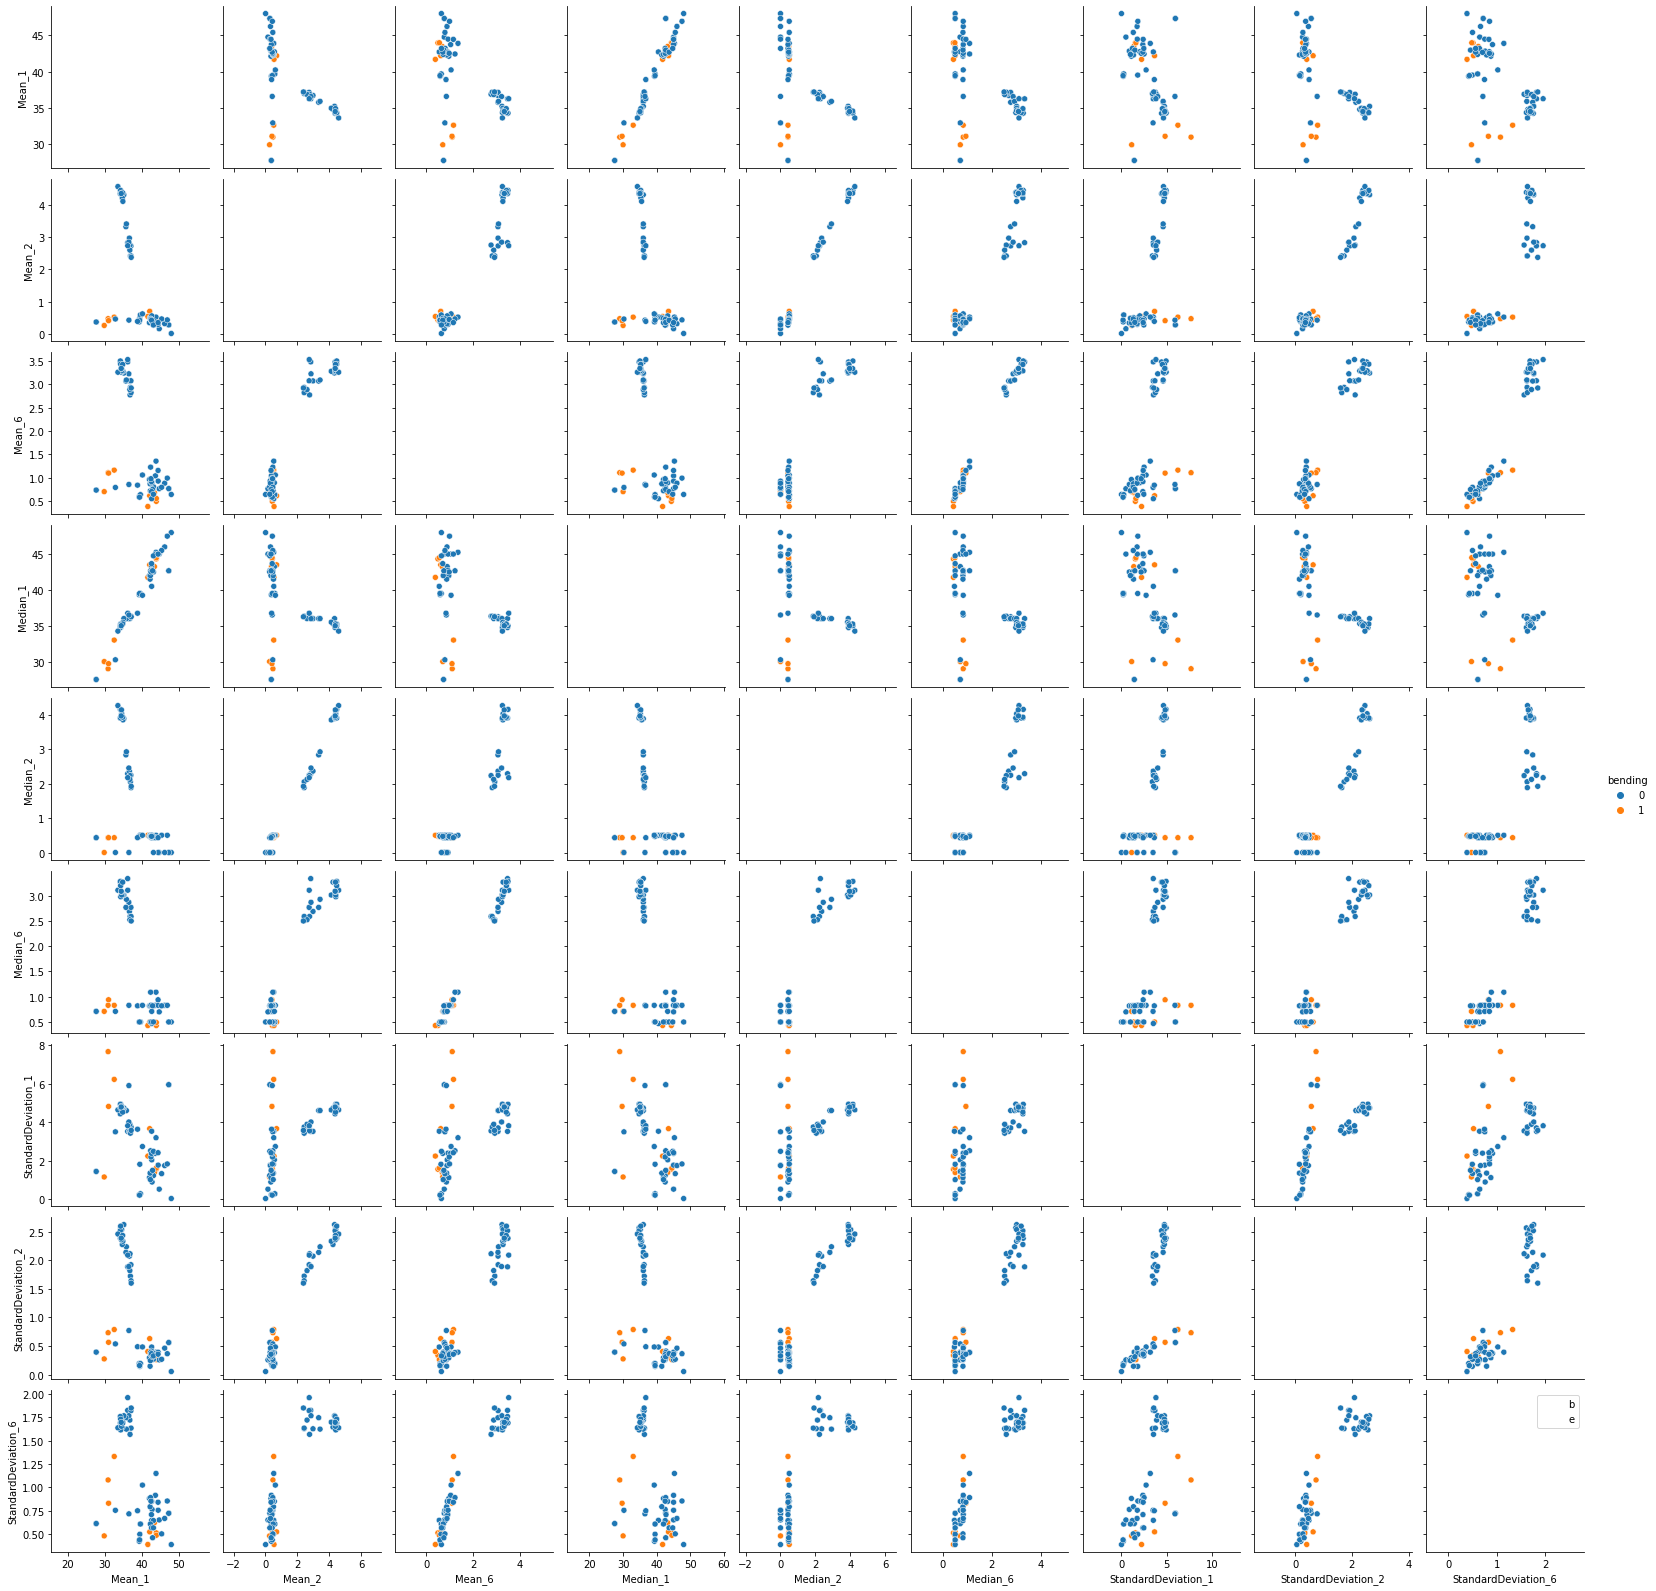

In [9]:
# Define a list that will contain the columns that we want for each statistic
columns = ['1', '2', '6']
features = ["Mean", "Median", "StandardDeviation"]


# Create a dictionary that will contain the values for the statistics (features)
featuresDict = {}


# Iteerate over the DataFrame of statistics and get only the columns 1, 2, and 6.
for columnName, columnData in statsDfTrain.items():
    
    # Check for the columns except bending and add them to the dictionary
    if len(columnName.split("_")) == 2 and columnName.split("_")[1] in columns and columnName.split("_")[0] in features:
        featuresDict[columnName] = columnData
    
    # Check for the bending column and add it to the dictionary
    elif columnName == "bending":
        featuresDict[columnName] = columnData

    
# Print the Pairplot of the features
print("Pairplot of features:")
plot = pd.DataFrame.from_dict(featuresDict, orient='columns')
sns.pairplot(plot, hue='bending', diag_kws={"linewidth": 0, "shade": False})
plt.legend("bending")

    ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?


In [10]:
# Create a statistics dictionary for the training set
trainStatsDict = {"trainingInstances": []}


# Iterate over the list of features and add all the indexes to the dictionary 
for stat in features:
    for i in range(12):
        trainStatsDict[stat+f"_{i+1}"] = []

        
# Iterate over the training instances        
count = 1
for instance in trainInstances:
    
    # Break the instances in two and append them to the dictionary of statistics
    instance1 = instance.iloc[:240]
    instance2 = instance.iloc[240:]
    trainStatsDict["trainingInstances"].append(count)
    count += 1 
    
    # Iterate over the columns and calculate the statistics while appending them to the dictionary
    for col in range(len(columnNames)):
        shift = col + 7
        
        # This part will do the first half of the instance
        column1 = instance1[columnNames[col]].values
        trainStatsDict[f"Mean_{col+1}"].append(sum(column1)/len(column1))
        trainStatsDict[f"Median_{col+1}"].append(np.median(column1))
        trainStatsDict[f"StandardDeviation_{col+1}"].append(stats.pstdev(column1))
        
        # This part will do the second half of the instance
        column2 = instance2[columnNames[col]].values
        trainStatsDict[f"Mean_{shift}"].append(sum(column2)/len(column2))
        trainStatsDict[f"Median_{shift}"].append(np.median(column2))
        trainStatsDict[f"StandardDeviation_{shift}"].append(stats.pstdev(column2))

        
# Transform the dictionary into a DataFrame
trainStatsDf = pd.DataFrame.from_dict(trainStatsDict, orient="columns")
trainStatsDf = trainStatsDf.set_index("trainingInstances")

# Add a bending column to the DataFrame and label them accordingly
trainStatsDf["bending"] = 0
trainStatsDf.loc[0:9, 'bending'] = 1

# Show the result of the DataFrame
trainStatsDf.head(69)

,Mean_1,Mean_2,Mean_3,Mean_4,Mean_5,Mean_6,Mean_7,Mean_8,Mean_9,Mean_10,...,StandardDeviation_4,StandardDeviation_5,StandardDeviation_6,StandardDeviation_7,StandardDeviation_8,StandardDeviation_9,StandardDeviation_10,StandardDeviation_11,StandardDeviation_12,bending
trainingInstances,,,,,,,,,,,,,,,,,,,,,
1,44.057167,0.381042,23.096792,0.493458,36.293542,0.598250,43.851833,0.471458,21.147917,0.501167,...,0.497381,1.312980,0.525558,1.553920,0.341632,3.263280,0.598136,2.293899,0.477530,1
2,43.278875,0.673292,23.141250,0.808042,36.022125,0.640958,41.080750,0.718792,21.226000,1.171792,...,0.767702,1.646664,0.553385,3.530103,0.626606,4.175005,1.076982,3.752276,0.490847,1
3,41.621208,0.623083,19.081458,1.115083,30.078333,0.419083,41.734917,0.448875,18.931667,0.568667,...,1.168386,2.695772,0.410342,0.594677,0.272481,2.719666,0.455340,2.058345,0.362386,1
4,44.117042,0.250042,17.744167,1.123000,23.218708,0.815417,42.792875,0.506125,13.842500,0.575708,...,1.139208,2.961299,0.716518,1.056584,0.260217,2.433343,0.728966,1.877797,0.472458,1
5,43.486208,0.378667,16.397250,0.662958,22.325458,0.524875,44.452042,0.447583,15.338792,0.669750,...,0.830807,4.262701,0.485832,1.767557,0.235002,3.925231,0.743058,1.925470,0.486900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,33.334500,4.408083,15.445333,3.271417,16.028333,3.229167,33.839250,4.745042,15.190375,3.183042,...,1.638594,3.328996,1.633895,4.402702,2.688600,3.032568,1.651708,3.225655,1.642591,0
66,34.036750,4.778292,15.177083,3.394083,15.580542,3.543708,34.608750,4.134375,15.242458,3.160375,...,1.511385,3.076681,1.699547,4.611762,2.382481,2.665951,1.476248,3.155737,1.754711,0
67,34.033875,4.574625,15.340417,3.025417,16.300667,3.244042,35.058583,4.169292,15.031042,3.031958,...,1.685070,2.876506,1.616389,4.870471,2.311099,2.696056,1.641537,2.654605,1.687524,0


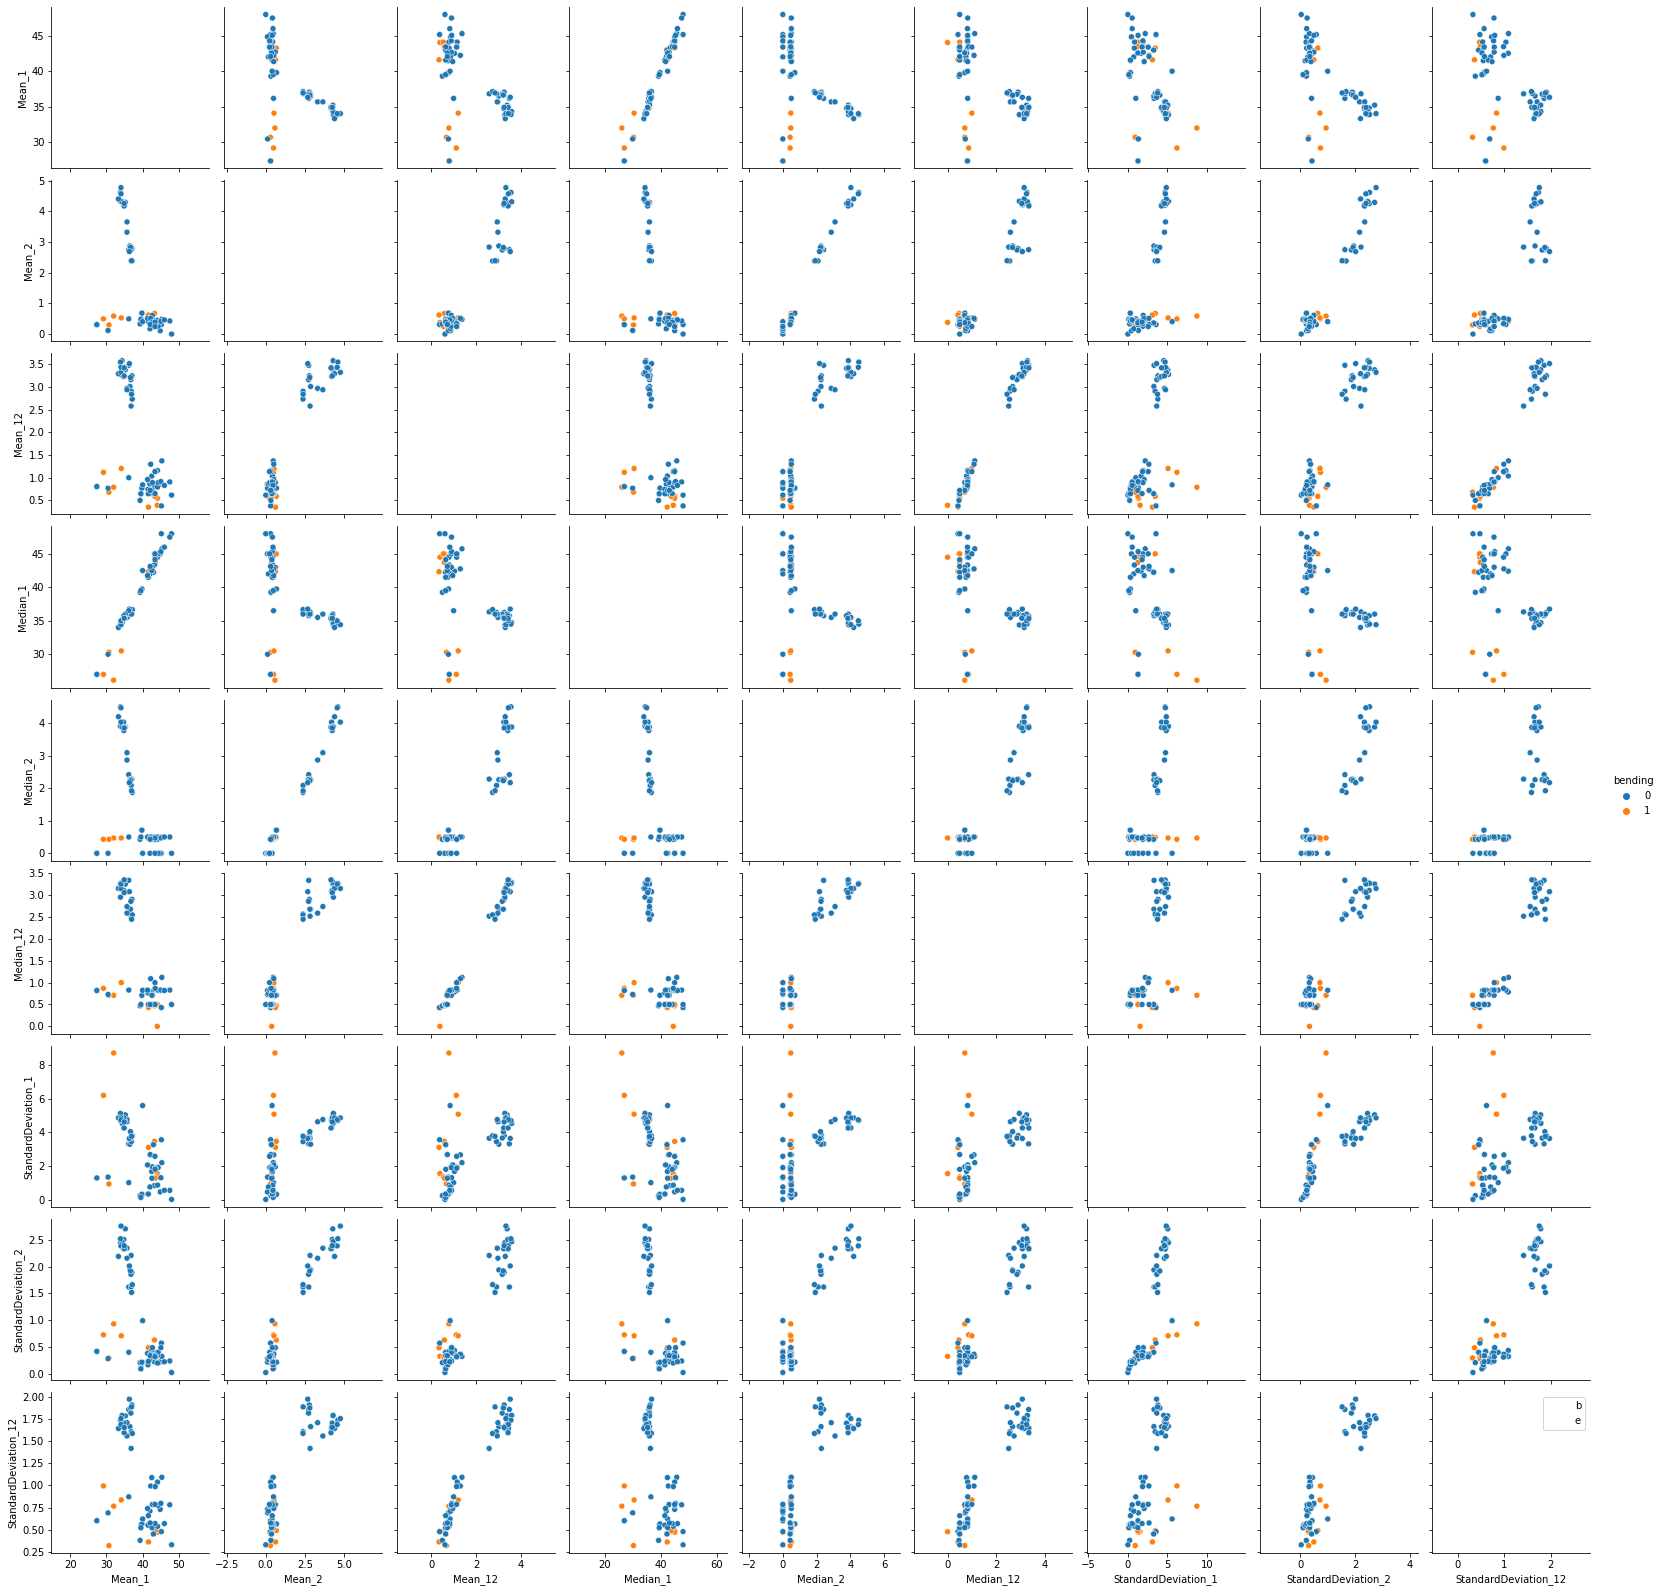

In [11]:
# Define the columns and statistics for which we want the values
columns = ['1', '2', '12']
features = ['Mean', 'Median', 'StandardDeviation']

# Create a dictionary that will store the features
featuresDict = {}

# Iterate over the DataFrame with the statistics and find the appropriate columns
for columnName, columnData in trainStatsDf.items():
    
    # This section will look for the columns except bending and add it to the dictionary of features
    if len(columnName.split("_")) == 2 and columnName.split("_")[1] in columns and columnName.split("_")[0] in features:
        featuresDict[columnName] = columnData
        
    # This section will look for the bending column and add it to the dictionary of features
    elif columnName == 'bending':
        featuresDict[columnName] = columnData
        
        
# Print the Pairplot of the features   
plot2 = pd.DataFrame.from_dict(featuresDict, orient='columns')
sns.pairplot(plot2, hue='bending', diag_kws={'linewidth': 0, 'shade': False})
plt.legend('bending')

    The pairwise plots from Q1 D(i) seemed to have shown more positive linear relations than the pairwise plot from Q1 D(ii). However, the plots seem to be very similar, despite having substituted the 6th time series with the 12th time series in D(ii). This could indicate that there is not a particular amount of variance in mean, median, and/or standard deviation across the instances.

    iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. 
    Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.

In [12]:
# Define a function that will get the dataframes for the appropriate length that we want to break the instance in
def getDataFrames(instances, length):
    
    # Calculate the breaking point
    step = 480//length

    # Define a list of DataFrames
    dataFrames = []
    
    # Iterate over the list of training instances
    instantLoc = 1
    for instance in instances:
        x = 0
        y = step
        
        # Break down the instances and append them to the dictionary
        while y <= 480:
            df = instance.iloc[x:y]
            dataFrames.append(df)
            x += step
            y += step
            
            
            # If the division is not exact, append the remaining of the dataset to the list
            if 480%length!=0 and y>480:
                temp = []
                temp.append(df)
                temp.append(instance.iloc[x:])
                final = pd.concat(temp)
                del dataFrames[-1]
                dataFrames.append(final)
                break
            instantLoc+=1
    
    # Return the list of DataFrames
    return(dataFrames)

In [13]:
# Define a function that will get the instances and transform them into the dictionary with the statistics
def createDictionary(listOfDataFrames, length):
    
    # Define the list of the columns that the instances contain
    columnNames = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'] 
    
    # Define the dictionary that will store everything
    statsDict = {}
    
    # Iterate over a range and add the appropriate keys to the dictionary
    i = 1
    while i<=length*6:
        statsDict[f"Mean_{i}"] = []
        statsDict[f"Median_{i}"] = []
        statsDict[f"StandardDeviation_{i}"] = []
        i += 1
        
    
    # Iterate over the list of DataFrames that comes in as an input (output of getDataFrames)
    instant = 1
    i = 1
    temp = 0
    iMax = i
    while temp<len(listOfDataFrames):
        
        # Get the DataFrame
        df = listOfDataFrames[temp]
        
        col = 0
        
        # Check the columns and calculate the statistics for the DataFrame and append them to the dictionary of statistics
        while col<len(columnNames) and i<=length*6:
            
            # Get each column and calculate the statistics
            column = df[columnNames[col]].values
            statsDict[f"Mean_{i}"].append(sum(column)/len(column))
            statsDict[f"Median_{i}"].append(np.median(column))
            statsDict[f"StandardDeviation_{i}"].append(stats.pstdev(column))
            col += 1
            i += 1
            
            if i>iMax: 
                iMax = i
        
        instant += 1
        if instant>length:
            instant = 1
            i = 1
        temp += 1
    
    # Output the dictionary with the statistics
    iMax -= 1
    output = []
    output.append(iMax)
    output.append(statsDict)
    return output

In [14]:
# Define a function that will create the table of the instances with the appropriate length
def createTable(instances, length, testOrTrain):
    
    # Get the DataFrames with the length
    dataFrames = getDataFrames(instances ,length)
    
    # Create the dictionary with the statistics
    statsDict = createDictionary(dataFrames, length)
    iMax = statsDict[0]
    statsDict = statsDict[1]
   
    # Convert the dictionary with the statistics into a DataFrame
    statsDf = pd.DataFrame.from_dict(statsDict, orient='columns')
    statsDf['TrainInstance'] = [*range(1, len(instances)+1, 1)]
    statsDf = statsDf.set_index('TrainInstance')
    
    # Add a bending column and label it appropriately
    if testOrTrain == 'train':
        statsDf['bending'] = 0
        statsDf.loc[0:9, 'bending'] = 1
    else:
        statsDf['bending'] = 0
        statsDf.loc[0:4, 'bending'] = 1
    
    # Create y training and drop the column from the stats dictionary
    y = statsDf['bending']
    statsDf = statsDf.drop(columns=['bending'])
    
    # Append everything into a list and return it
    result = []
    result.append(iMax)
    result.append(y)
    result.append(statsDf)
    return result

In [15]:
# Create a list that will store the dataframes of different lengths
lDataFrames = []
columns = []

# Iterate over the different lengths from 1 to 20 and create the DataFrames from the instances
for l in [*range(1, 21, 1)]:
    statsDf = createTable(trainInstances, l, 'train')
    columns.append(statsDf[0])
    trainingY = statsDf[1].astype(int)
    statsDf = statsDf[2]
    
    # Print the results of each DataFrame for each l
    print(f'Time series table of length: {l}')
    print(statsDf.head(69))
    lDataFrames.append(statsDf)

Time series table of length: 1
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.954500     44.33             1.557210  0.426250     0.470   
2              42.179813     43.50             3.666840  0.696042     0.500   
3              41.678063     41.75             2.241152  0.535979     0.500   
4              43.454958     43.25             1.384653  0.378083     0.470   
5              43.969125     44.50             1.616677  0.413125     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.586875     34.25             4.646088  4.576562     4.260   
66             34.322750     35.25             4.747524  4.456333     3.900   
67             34.546229     35.25             4.837247  4.371958     4.135   
68             34.873229     35.25             4.526997  4.380583     3.925   
69             34.473

Time series table of length: 3
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.945125    44.500             1.382405  0.350125     0.430   
2              43.621187    45.000             3.337547  0.594750     0.470   
3              40.673812    41.500             3.193203  0.698312     0.500   
4              44.792125    45.000             0.794643  0.177937     0.000   
5              43.067250    42.775             0.994597  0.408750     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.325625    33.875             4.973805  4.371312     4.195   
66             34.183250    34.750             4.931072  4.857625     4.150   
67             34.015313    34.710             4.661228  4.622313     4.500   
68             34.894813    35.250             4.342867  4.420500     3.980   
69             35.002

Time series table of length: 5
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.877396    44.500             1.229746  0.373229     0.470   
2              44.032812    45.000             2.942769  0.513125     0.470   
3              41.160000    41.875             2.644297  0.595521     0.500   
4              44.936563    45.000             0.620223  0.096042     0.000   
5              42.731875    42.500             0.935547  0.374167     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.791979    34.500             4.976733  4.471979     4.455   
66             34.328125    34.625             4.709497  5.073125     4.045   
67             34.224167    34.500             4.355201  4.444687     4.280   
68             34.669792    35.125             4.131463  4.516979     3.965   
69             35.437

Time series table of length: 7
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.183676    44.500             1.101238  0.386618     0.485   
2              44.461912    45.000             2.762411  0.448971     0.430   
3              41.722059    42.000             2.045513  0.500441     0.500   
4              44.910441    45.000             0.735346  0.135588     0.000   
5              42.868971    42.710             0.903620  0.478382     0.500   
...                  ...       ...                  ...       ...       ...   
65             34.380294    34.625             4.658245  4.408088     4.495   
66             34.471912    34.625             4.413387  5.235294     4.440   
67             34.117941    34.375             4.293427  4.352794     4.240   
68             34.688824    34.670             4.209596  4.672941     4.060   
69             35.894

Time series table of length: 9
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.097358     44.50             1.228769  0.363208      0.47   
2              44.303396     45.00             3.110431  0.567170      0.47   
3              41.832075     42.00             2.088224  0.508113      0.50   
4              44.870943     45.00             0.826964  0.149623      0.00   
5              42.964528     42.75             0.989741  0.471509      0.50   
...                  ...       ...                  ...       ...       ...   
65             34.968491     35.25             4.635602  4.315660      4.50   
66             34.393208     34.00             4.616667  5.663396      4.60   
67             33.939057     34.25             4.357904  4.266604      4.24   
68             34.498679     34.67             4.423482  4.567358      4.24   
69             36.006

Time series table of length: 11
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.003721     44.50             1.334621  0.354419      0.43   
2              44.089070     45.00             3.415469  0.645814      0.50   
3              41.790233     42.00             2.120592  0.489070      0.50   
4              44.840930     45.00             0.915497  0.184419      0.00   
5              43.008605     43.00             1.012068  0.473488      0.50   
...                  ...       ...                  ...       ...       ...   
65             35.521163     36.33             4.605239  4.146744      4.49   
66             34.036977     33.50             4.627351  5.999767      4.72   
67             34.159302     34.25             4.511032  4.171163      4.24   
68             34.316047     34.67             4.494593  4.602093      4.24   
69             35.89

Time series table of length: 13
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.946667    44.625             1.446442  0.323056     0.430   
2              43.678056    45.000             3.563888  0.683611     0.500   
3              41.614722    42.000             2.180201  0.456111     0.480   
4              44.810000    45.000             0.997611  0.220278     0.000   
5              42.725556    42.710             0.854291  0.459167     0.470   
...                  ...       ...                  ...       ...       ...   
65             35.620278    36.290             4.617587  4.145556     4.335   
66             34.315000    34.125             4.881673  5.706944     4.590   
67             34.005000    33.960             4.373916  4.058889     4.180   
68             34.597222    35.415             4.732139  4.670556     4.380   
69             36.10

Time series table of length: 15
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.885312    45.000             1.522621  0.290625     0.000   
2              43.424375    45.000             3.672942  0.713125     0.500   
3              41.839375    42.000             2.172032  0.460938     0.485   
4              44.786250    45.000             1.055725  0.247812     0.000   
5              42.687500    42.670             0.874257  0.460313     0.485   
...                  ...       ...                  ...       ...       ...   
65             34.900937    35.460             4.327448  4.097187     4.335   
66             34.721562    35.000             4.474337  5.636562     4.650   
67             34.247813    34.375             4.194283  4.001250     4.240   
68             34.625000    34.790             4.880184  4.646562     4.380   
69             36.54

Time series table of length: 17
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.726071    44.625             1.564196  0.332143     0.430   
2              44.270714    45.000             3.057469  0.668929     0.500   
3              41.795714    42.000             2.159802  0.463571     0.485   
4              44.755714    45.000             1.125308  0.283214     0.000   
5              42.735000    42.710             0.915066  0.479643     0.500   
...                  ...       ...                  ...       ...       ...   
65             34.672500    35.250             4.425751  4.097857     4.375   
66             34.800714    34.125             4.639543  5.704286     4.870   
67             34.018571    34.375             4.012968  4.008214     4.240   
68             35.017857    35.415             4.580244  4.408571     4.380   
69             36.95

Time series table of length: 19
                Mean_1  Median_1  StandardDeviation_1  Mean_2  Median_2  \
TrainInstance                                                             
1              43.5732     44.33             1.588143  0.3720      0.43   
2              44.2032     45.00             3.194633  0.6424      0.50   
3              41.5012     42.00             2.068805  0.4860      0.50   
4              44.7464     45.00             1.187771  0.2972      0.00   
5              42.8932     43.00             0.820106  0.4840      0.50   
...                ...       ...                  ...     ...       ...   
65             34.3432     35.25             4.294646  4.0924      3.70   
66             34.9668     34.50             4.617280  6.0148      5.74   
67             33.9168     34.25             4.094807  3.9236      3.90   
68             34.9732     35.33             4.732774  4.4404      4.50   
69             36.8268     37.67             3.613125  4.0368      3

In [16]:
# Create a dictionary to store the l, p, and used columns.
resultsDict = {}

# For each size from 1-20 train the model with the train data
for l in range(20):
    X = lDataFrames[l]
    
    # Define the model 
    model = LogisticRegression(max_iter=10000)
    # 5-fold cross validation
    crossVal = KFold(n_splits=5, random_state=1, shuffle=True)
    rfecv = RFECV(model, cv=crossVal, min_features_to_select=2)
    rfecv = rfecv.fit(X.values, trainingY.values)
    cols = rfecv.support_
    
    # Get the results and all the coluns used in the training set
    results = rfecv.cv_results_
    columns = list(lDataFrames[l].columns)
    
    # Get the maximum test score for that model
    score = max(rfecv.cv_results_['mean_test_score'])
    
    # Get a list of the columns that need to be pruned. 
    features = []
    for i in range(len(cols)):
        if cols[i] == True:
            features.append(columns[i])
    p = len(features)      
    
    # Append the values to a dictionary with their respecitve l
    modelAttributes = [p, score, features]
    resultsDict[l+1] = modelAttributes

In [17]:
# Iterate over the different values and select the best pair of l and p
maxScore = 0
bestCols = []
bestP = 0
bestL = 0

# Iterate over the dictionary of model results and get the best pair of l and p
for l in resultsDict:
    if resultsDict[l][1] > maxScore:
        maxScore = resultsDict[l][1]
        bestCols = resultsDict[l][2]
        bestP = len(resultsDict[l][2])
        bestL = l
        
# Print the best l and p
bestLP = (bestL, bestP)
print("The best (l,p) pair is: ", bestLP)

The best (l,p) pair is:  (6, 7)


Given the results of the 5-fold cross validation, it appears that the best value pair of (l,p) is (6,7). There are several methods to perform cross validation and in this problem I was between RFE and RFECV. Instead of pruning the training data with the p-values manually, I got help from the TA and he lead me through using RFECV. This would do it automatically and help me filter out the columns that were not necessary. This form of cross validation is beneficial because it is a model with low bias, it does not take so much time to run and is suitable with a loop for several datasets with large amounts of data. Other forms of cross-validation can require higher computation time. However, I saw that most of the models trained only used one column as the selected one. 

    iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [18]:
# Define the pruned dataframe for training the model 
prunedX = lDataFrames[bestL-1][bestCols]

# Define the model with the cross validation and the pruned dataframe
model = LogisticRegression(max_iter=10000)
# 5-fold cross validation
model.fit(prunedX, trainingY)


# Use the model to get the confusion matrix on the training data
trainPredictionY = model.predict(prunedX)
trainingConfusionMatrix = confusion_matrix(trainingY, trainPredictionY)

print("Confusion Matrix: ")
print(trainingConfusionMatrix)

Confusion Matrix: 
[[60  0]
 [ 0  9]]


    v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously

In [19]:
# Create a list that will store the dataframes of different lengths
lDataFramesTest = []
columns = []

# Iterate over the different lengths from 1 to 20 and create the DataFrames from the instances

statsDfTest = createTable(testInstances, bestL, 'test')
columns.append(statsDfTest[0])
testingY = statsDfTest[1].astype(int)
statsDfTest = statsDfTest[2]

# Print the results of each DataFrame for each l
print(f'Time series table for l={l}')
print(statsDfTest.head(19))


Time series table for l=20
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              40.927250    41.500             0.935199  0.470125     0.500   
2              43.418500    43.500             0.325293  0.557000     0.500   
3              21.608250    22.000             2.843663  0.909000     0.710   
4              28.634250    29.500             1.432546  0.102375     0.000   
5              36.743875    35.625             3.745675  2.335750     2.025   
6              37.432500    36.750             2.957847  2.079625     1.855   
7              37.831125    36.670             3.096620  2.080625     1.355   
8              28.660500    29.000             0.823747  0.288125     0.000   
9              29.181125    29.000             0.527764  0.235375     0.000   
10             48.000000    48.000             0.000000  0.000000     0.000   
11             41.875125 

In [20]:
# Retrain the model with the training set and the important columns
prunedTestX = statsDfTest[bestCols]
prunedX = lDataFrames[bestL-1][bestCols]

model = LogisticRegression(max_iter=10000)
# 5-fold cross validation
model.fit(prunedX, trainingY)

prediction = model.predict(prunedTestX)

score = model.score(prunedTestX, testingY)
print("Accuracy: ",score)

print("Prediction: ",prediction)
print("Coefficients: ",model.coef_[0])
print("Intercept: ",model.intercept_)


Accuracy:  1.0
Prediction:  [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Coefficients:  [ 0.67314524  0.47199678 -0.36908527 -0.36533714 -0.35318779 -0.35087491
  0.29990693]
Intercept:  [-14.06104391]


We can see that the accuracy from the test set is 0.894 and the accuracy of the cross validation I obtained before is 0.969. 

    vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?


    It appears that the classes are well-separated to cause instability in calculating logistic regression parameters. When I fit the logistic regression model (LogisticRegression() from scikit-learn) without adding a limit to it, I received several warnings saying that the maximum number of iterations have been surpassed. From the footnote 5 of the homework assignment, the warning is an indication of instability in calculating the logistic regression parameters, a result of well-separated classes. I added a maximum interations parameter in the logistic regression model to prevent this instability, and I set the parameter to 10000 which was a number that I found to be suitable. 

    vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

(e) Binary Classification Using L1-penalized logistic regression

    i. Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9

In [21]:
# Get df for the different ls in from the training data

lDataFrames = []
columns = []
for l in [*range(1, 21, 1)]:
    statsDf = createTable(trainInstances, l, 'train')
    columns.append(statsDf[0])
    trainingY = statsDf[1]
    statsDf = statsDf[2]
    print(f'Time series table of length: {l}')
    print(statsDf.head(69))
    lDataFrames.append(statsDf)

Time series table of length: 1
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.954500     44.33             1.557210  0.426250     0.470   
2              42.179813     43.50             3.666840  0.696042     0.500   
3              41.678063     41.75             2.241152  0.535979     0.500   
4              43.454958     43.25             1.384653  0.378083     0.470   
5              43.969125     44.50             1.616677  0.413125     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.586875     34.25             4.646088  4.576562     4.260   
66             34.322750     35.25             4.747524  4.456333     3.900   
67             34.546229     35.25             4.837247  4.371958     4.135   
68             34.873229     35.25             4.526997  4.380583     3.925   
69             34.473

Time series table of length: 3
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.945125    44.500             1.382405  0.350125     0.430   
2              43.621187    45.000             3.337547  0.594750     0.470   
3              40.673812    41.500             3.193203  0.698312     0.500   
4              44.792125    45.000             0.794643  0.177937     0.000   
5              43.067250    42.775             0.994597  0.408750     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.325625    33.875             4.973805  4.371312     4.195   
66             34.183250    34.750             4.931072  4.857625     4.150   
67             34.015313    34.710             4.661228  4.622313     4.500   
68             34.894813    35.250             4.342867  4.420500     3.980   
69             35.002

Time series table of length: 5
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.877396    44.500             1.229746  0.373229     0.470   
2              44.032812    45.000             2.942769  0.513125     0.470   
3              41.160000    41.875             2.644297  0.595521     0.500   
4              44.936563    45.000             0.620223  0.096042     0.000   
5              42.731875    42.500             0.935547  0.374167     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.791979    34.500             4.976733  4.471979     4.455   
66             34.328125    34.625             4.709497  5.073125     4.045   
67             34.224167    34.500             4.355201  4.444687     4.280   
68             34.669792    35.125             4.131463  4.516979     3.965   
69             35.437

Time series table of length: 7
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.183676    44.500             1.101238  0.386618     0.485   
2              44.461912    45.000             2.762411  0.448971     0.430   
3              41.722059    42.000             2.045513  0.500441     0.500   
4              44.910441    45.000             0.735346  0.135588     0.000   
5              42.868971    42.710             0.903620  0.478382     0.500   
...                  ...       ...                  ...       ...       ...   
65             34.380294    34.625             4.658245  4.408088     4.495   
66             34.471912    34.625             4.413387  5.235294     4.440   
67             34.117941    34.375             4.293427  4.352794     4.240   
68             34.688824    34.670             4.209596  4.672941     4.060   
69             35.894

Time series table of length: 9
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.097358     44.50             1.228769  0.363208      0.47   
2              44.303396     45.00             3.110431  0.567170      0.47   
3              41.832075     42.00             2.088224  0.508113      0.50   
4              44.870943     45.00             0.826964  0.149623      0.00   
5              42.964528     42.75             0.989741  0.471509      0.50   
...                  ...       ...                  ...       ...       ...   
65             34.968491     35.25             4.635602  4.315660      4.50   
66             34.393208     34.00             4.616667  5.663396      4.60   
67             33.939057     34.25             4.357904  4.266604      4.24   
68             34.498679     34.67             4.423482  4.567358      4.24   
69             36.006

Time series table of length: 11
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.003721     44.50             1.334621  0.354419      0.43   
2              44.089070     45.00             3.415469  0.645814      0.50   
3              41.790233     42.00             2.120592  0.489070      0.50   
4              44.840930     45.00             0.915497  0.184419      0.00   
5              43.008605     43.00             1.012068  0.473488      0.50   
...                  ...       ...                  ...       ...       ...   
65             35.521163     36.33             4.605239  4.146744      4.49   
66             34.036977     33.50             4.627351  5.999767      4.72   
67             34.159302     34.25             4.511032  4.171163      4.24   
68             34.316047     34.67             4.494593  4.602093      4.24   
69             35.89

Time series table of length: 13
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.946667    44.625             1.446442  0.323056     0.430   
2              43.678056    45.000             3.563888  0.683611     0.500   
3              41.614722    42.000             2.180201  0.456111     0.480   
4              44.810000    45.000             0.997611  0.220278     0.000   
5              42.725556    42.710             0.854291  0.459167     0.470   
...                  ...       ...                  ...       ...       ...   
65             35.620278    36.290             4.617587  4.145556     4.335   
66             34.315000    34.125             4.881673  5.706944     4.590   
67             34.005000    33.960             4.373916  4.058889     4.180   
68             34.597222    35.415             4.732139  4.670556     4.380   
69             36.10

Time series table of length: 15
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.885312    45.000             1.522621  0.290625     0.000   
2              43.424375    45.000             3.672942  0.713125     0.500   
3              41.839375    42.000             2.172032  0.460938     0.485   
4              44.786250    45.000             1.055725  0.247812     0.000   
5              42.687500    42.670             0.874257  0.460313     0.485   
...                  ...       ...                  ...       ...       ...   
65             34.900937    35.460             4.327448  4.097187     4.335   
66             34.721562    35.000             4.474337  5.636562     4.650   
67             34.247813    34.375             4.194283  4.001250     4.240   
68             34.625000    34.790             4.880184  4.646562     4.380   
69             36.54

Time series table of length: 17
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.726071    44.625             1.564196  0.332143     0.430   
2              44.270714    45.000             3.057469  0.668929     0.500   
3              41.795714    42.000             2.159802  0.463571     0.485   
4              44.755714    45.000             1.125308  0.283214     0.000   
5              42.735000    42.710             0.915066  0.479643     0.500   
...                  ...       ...                  ...       ...       ...   
65             34.672500    35.250             4.425751  4.097857     4.375   
66             34.800714    34.125             4.639543  5.704286     4.870   
67             34.018571    34.375             4.012968  4.008214     4.240   
68             35.017857    35.415             4.580244  4.408571     4.380   
69             36.95

Time series table of length: 19
                Mean_1  Median_1  StandardDeviation_1  Mean_2  Median_2  \
TrainInstance                                                             
1              43.5732     44.33             1.588143  0.3720      0.43   
2              44.2032     45.00             3.194633  0.6424      0.50   
3              41.5012     42.00             2.068805  0.4860      0.50   
4              44.7464     45.00             1.187771  0.2972      0.00   
5              42.8932     43.00             0.820106  0.4840      0.50   
...                ...       ...                  ...     ...       ...   
65             34.3432     35.25             4.294646  4.0924      3.70   
66             34.9668     34.50             4.617280  6.0148      5.74   
67             33.9168     34.25             4.094807  3.9236      3.90   
68             34.9732     35.33             4.732774  4.4404      4.50   
69             36.8268     37.67             3.613125  4.0368      3

In [22]:
# Create a dictionary to store the l, p, and used columns.
resultsDict = {}

scaler = StandardScaler()
# For each size from 1-20 train the model with the train data
for l in range(20):
    X = lDataFrames[l]
    scaled_data = scaler.fit_transform(X)
    
    # Define the model 
    model = LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')
    # 5-fold cross validation
    crossVal = KFold(n_splits=5, random_state=1, shuffle=True)
    rfecv = RFECV(model, cv=crossVal, min_features_to_select=2)
    rfecv = rfecv.fit(X.values, trainingY.values)
    cols = rfecv.support_
    
    # Get the results and all the coluns used in the training set
    results = rfecv.cv_results_
    columns = list(lDataFrames[l].columns)
    
    # Get the maximum test score for that model
    score = max(results['mean_test_score'])
    
    # Get a list of the columns that need to be pruned. 
    features = []
    for i in range(len(cols)):
        if cols[i] == True:
            features.append(columns[i])
    p = len(features)      
    
    # Append the values to a dictionary with their respecitve l
    modelAttributes = [p, score, features]
    resultsDict[l+1] = modelAttributes

In [23]:
# Iterate over the different values and select the best pair of l and p
maxScore = 0
bestCols = []
bestP = 0
bestL = 0

# Iterate over the dictionary of model results and get the best pair of l and p
for l in resultsDict:
    if resultsDict[l][1] > maxScore:
        maxScore = resultsDict[l][1]
        bestCols = resultsDict[l][2]
        bestP = len(resultsDict[l][2])
        bestL = l
        
# Print the best l and p
bestLP = (bestL, bestP)
print("The best (l,p) pair is: ", bestLP)

The best (l,p) pair is:  (4, 4)


    ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

    The model that is not penalized with L1 performs better since it has a higher score. 

(f) Multi-class Classification (The Realistic Case)

    i. Find the best l in the same way as you found it in 1(e)i to build an L1-penalized multinomial regression model to classify all activities in your training set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11

In [24]:
# Get df for the different ls in from the training data
lDataFrames = []
columns = []
for l in [*range(1, 21, 1)]:
    statsDf = createTable(trainInstances, l, 'train')
    columns.append(statsDf[0])
    trainingY = statsDf[1]
    statsDf = statsDf[2]
    print(f'Time series table of length: {l}')
    print(statsDf.head(69))
    lDataFrames.append(statsDf)

Time series table of length: 1
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.954500     44.33             1.557210  0.426250     0.470   
2              42.179813     43.50             3.666840  0.696042     0.500   
3              41.678063     41.75             2.241152  0.535979     0.500   
4              43.454958     43.25             1.384653  0.378083     0.470   
5              43.969125     44.50             1.616677  0.413125     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.586875     34.25             4.646088  4.576562     4.260   
66             34.322750     35.25             4.747524  4.456333     3.900   
67             34.546229     35.25             4.837247  4.371958     4.135   
68             34.873229     35.25             4.526997  4.380583     3.925   
69             34.473

Time series table of length: 3
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.945125    44.500             1.382405  0.350125     0.430   
2              43.621187    45.000             3.337547  0.594750     0.470   
3              40.673812    41.500             3.193203  0.698312     0.500   
4              44.792125    45.000             0.794643  0.177937     0.000   
5              43.067250    42.775             0.994597  0.408750     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.325625    33.875             4.973805  4.371312     4.195   
66             34.183250    34.750             4.931072  4.857625     4.150   
67             34.015313    34.710             4.661228  4.622313     4.500   
68             34.894813    35.250             4.342867  4.420500     3.980   
69             35.002

Time series table of length: 5
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.877396    44.500             1.229746  0.373229     0.470   
2              44.032812    45.000             2.942769  0.513125     0.470   
3              41.160000    41.875             2.644297  0.595521     0.500   
4              44.936563    45.000             0.620223  0.096042     0.000   
5              42.731875    42.500             0.935547  0.374167     0.470   
...                  ...       ...                  ...       ...       ...   
65             33.791979    34.500             4.976733  4.471979     4.455   
66             34.328125    34.625             4.709497  5.073125     4.045   
67             34.224167    34.500             4.355201  4.444687     4.280   
68             34.669792    35.125             4.131463  4.516979     3.965   
69             35.437

Time series table of length: 7
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.183676    44.500             1.101238  0.386618     0.485   
2              44.461912    45.000             2.762411  0.448971     0.430   
3              41.722059    42.000             2.045513  0.500441     0.500   
4              44.910441    45.000             0.735346  0.135588     0.000   
5              42.868971    42.710             0.903620  0.478382     0.500   
...                  ...       ...                  ...       ...       ...   
65             34.380294    34.625             4.658245  4.408088     4.495   
66             34.471912    34.625             4.413387  5.235294     4.440   
67             34.117941    34.375             4.293427  4.352794     4.240   
68             34.688824    34.670             4.209596  4.672941     4.060   
69             35.894

Time series table of length: 9
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.097358     44.50             1.228769  0.363208      0.47   
2              44.303396     45.00             3.110431  0.567170      0.47   
3              41.832075     42.00             2.088224  0.508113      0.50   
4              44.870943     45.00             0.826964  0.149623      0.00   
5              42.964528     42.75             0.989741  0.471509      0.50   
...                  ...       ...                  ...       ...       ...   
65             34.968491     35.25             4.635602  4.315660      4.50   
66             34.393208     34.00             4.616667  5.663396      4.60   
67             33.939057     34.25             4.357904  4.266604      4.24   
68             34.498679     34.67             4.423482  4.567358      4.24   
69             36.006

Time series table of length: 11
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              44.003721     44.50             1.334621  0.354419      0.43   
2              44.089070     45.00             3.415469  0.645814      0.50   
3              41.790233     42.00             2.120592  0.489070      0.50   
4              44.840930     45.00             0.915497  0.184419      0.00   
5              43.008605     43.00             1.012068  0.473488      0.50   
...                  ...       ...                  ...       ...       ...   
65             35.521163     36.33             4.605239  4.146744      4.49   
66             34.036977     33.50             4.627351  5.999767      4.72   
67             34.159302     34.25             4.511032  4.171163      4.24   
68             34.316047     34.67             4.494593  4.602093      4.24   
69             35.89

Time series table of length: 13
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.946667    44.625             1.446442  0.323056     0.430   
2              43.678056    45.000             3.563888  0.683611     0.500   
3              41.614722    42.000             2.180201  0.456111     0.480   
4              44.810000    45.000             0.997611  0.220278     0.000   
5              42.725556    42.710             0.854291  0.459167     0.470   
...                  ...       ...                  ...       ...       ...   
65             35.620278    36.290             4.617587  4.145556     4.335   
66             34.315000    34.125             4.881673  5.706944     4.590   
67             34.005000    33.960             4.373916  4.058889     4.180   
68             34.597222    35.415             4.732139  4.670556     4.380   
69             36.10

Time series table of length: 15
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.885312    45.000             1.522621  0.290625     0.000   
2              43.424375    45.000             3.672942  0.713125     0.500   
3              41.839375    42.000             2.172032  0.460938     0.485   
4              44.786250    45.000             1.055725  0.247812     0.000   
5              42.687500    42.670             0.874257  0.460313     0.485   
...                  ...       ...                  ...       ...       ...   
65             34.900937    35.460             4.327448  4.097187     4.335   
66             34.721562    35.000             4.474337  5.636562     4.650   
67             34.247813    34.375             4.194283  4.001250     4.240   
68             34.625000    34.790             4.880184  4.646562     4.380   
69             36.54

Time series table of length: 17
                  Mean_1  Median_1  StandardDeviation_1    Mean_2  Median_2  \
TrainInstance                                                                 
1              43.726071    44.625             1.564196  0.332143     0.430   
2              44.270714    45.000             3.057469  0.668929     0.500   
3              41.795714    42.000             2.159802  0.463571     0.485   
4              44.755714    45.000             1.125308  0.283214     0.000   
5              42.735000    42.710             0.915066  0.479643     0.500   
...                  ...       ...                  ...       ...       ...   
65             34.672500    35.250             4.425751  4.097857     4.375   
66             34.800714    34.125             4.639543  5.704286     4.870   
67             34.018571    34.375             4.012968  4.008214     4.240   
68             35.017857    35.415             4.580244  4.408571     4.380   
69             36.95

Time series table of length: 19
                Mean_1  Median_1  StandardDeviation_1  Mean_2  Median_2  \
TrainInstance                                                             
1              43.5732     44.33             1.588143  0.3720      0.43   
2              44.2032     45.00             3.194633  0.6424      0.50   
3              41.5012     42.00             2.068805  0.4860      0.50   
4              44.7464     45.00             1.187771  0.2972      0.00   
5              42.8932     43.00             0.820106  0.4840      0.50   
...                ...       ...                  ...     ...       ...   
65             34.3432     35.25             4.294646  4.0924      3.70   
66             34.9668     34.50             4.617280  6.0148      5.74   
67             33.9168     34.25             4.094807  3.9236      3.90   
68             34.9732     35.33             4.732774  4.4404      4.50   
69             36.8268     37.67             3.613125  4.0368      3

In [25]:
# Create a dictionary to store the l, p, and used columns.
resultsDict = {}

scaler = StandardScaler()
# For each size from 1-20 train the model with the train data
for l in range(20):
    X = lDataFrames[l]
    scaled_data = scaler.fit_transform(X)
    
    # Define the model 
    model = LogisticRegression(max_iter=10000, penalty='l1', solver='saga', multi_class='multinomial')
    # 5-fold cross validation
    crossVal = KFold(n_splits=5, random_state=1, shuffle=True)
    rfecv = RFECV(model, cv=crossVal, min_features_to_select=2)
    rfecv = rfecv.fit(X.values, trainingY.values)
    cols = rfecv.support_
    
    # Get the results and all the coluns used in the training set
    results = rfecv.cv_results_
    columns = list(lDataFrames[l].columns)
    
    # Get the maximum test score for that model
    score = max(results['mean_test_score'])
    
    # Get a list of the columns that need to be pruned. 
    features = []
    for i in range(len(cols)):
        if cols[i] == True:
            features.append(columns[i])
    p = len(features)      
    
    # Append the values to a dictionary with their respecitve l
    modelAttributes = [p, score, features]
    resultsDict[l+1] = modelAttributes

In [26]:
# Iterate over the different values and select the best pair of l and p
maxScore = 0
bestCols = []
bestP = 0
bestL = 0

# Iterate over the dictionary of model results and get the best pair of l and p
for l in resultsDict:
    if resultsDict[l][1] > maxScore:
        maxScore = resultsDict[l][1]
        bestCols = resultsDict[l][2]
        bestP = len(resultsDict[l][2])
        bestL = l
        
# Print the best l and p
bestLP = (bestL, bestP)
print("The best (l,p) pair is: ", bestLP)

The best (l,p) pair is:  (4, 4)


    ii. Repeat 1(f)i using a Na¨ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

    iii. Which method is better for multi-class classification in this problem?

2. ISLR 3.7.4

A) Even though the data do have a linear relationship, I would guess that the cubic regression would have the lower RSS. This deduction can be made because a model with increased flexibility can better fit, in this case over-fit, the data, thus leading to a lower RSS for the cubic regression.

B) Most likely, the linear regression will have a lower RSS when using the test dat. While flexible models (in this case, teh cubic regression) tend to have higher variance and lower bias and inflexible models (in this case, the linear regression) tend to have lower variance and higher bias, the linear regression will ahve low bias as well because we alredy know that the tru relationship between X and Y is linear. Therefore, with both low variance and low bias, and because the cubic regression would have higher error than the linear regression, the linear regression will likely have the lower RSS.

C) As stated in Question A, the cubic regression would have the lower RSS because a model with increased flexibility can better fit (even if the result is over-fitting) the data.

D) With limited infomration regarding the relationship between X and Y, there is not enough information to answer this question with certainty. In Question B, it oculd be deduced that the linear regression would have a lower RSS because it was known that the bias of that model would be low given teh true linear relationship between X and Y; however, ow that the relationship between X and Y is no longer known, there is on way to be sure of the degree of bias in the linear regression model, and it is therefore difficult to compare it to the cubic regression model.

3. ISLR, 4.8.3

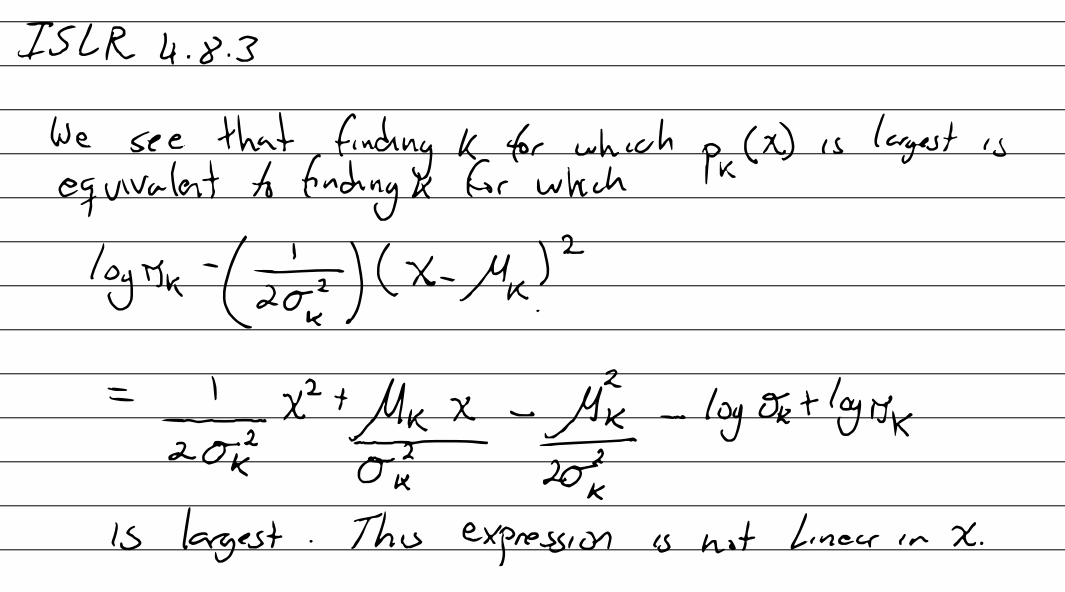

4. ISLR 4.8.7

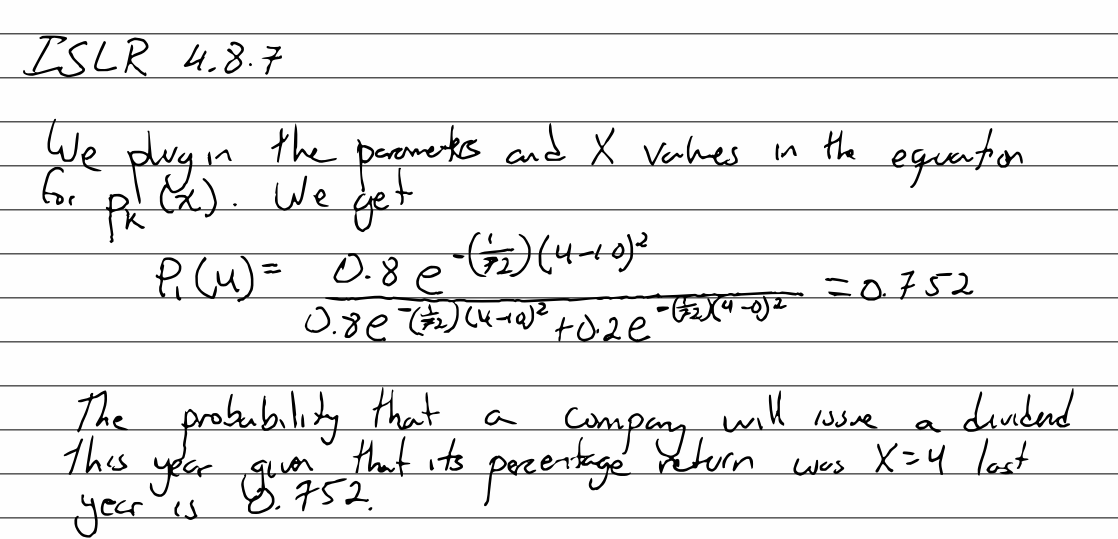